# **Sia Vashist**
# 20190802107


---



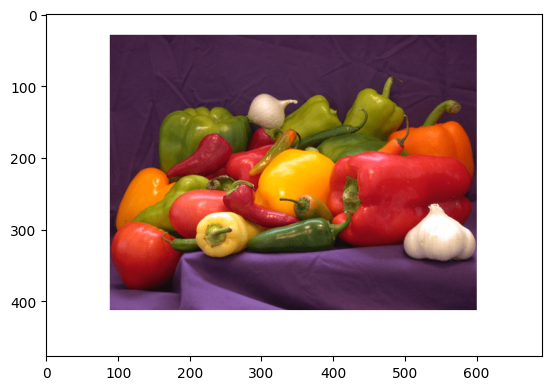

In [57]:
#Reading Image:
import matplotlib.pyplot as plt
import numpy as np

# Load the image
vegetable_image = np.array(plt.imread('Vegetable Image.png'))

# Display the image
plt.imshow(vegetable_image)
plt.show()

# **A. Edge Detection using Prewitt filter**

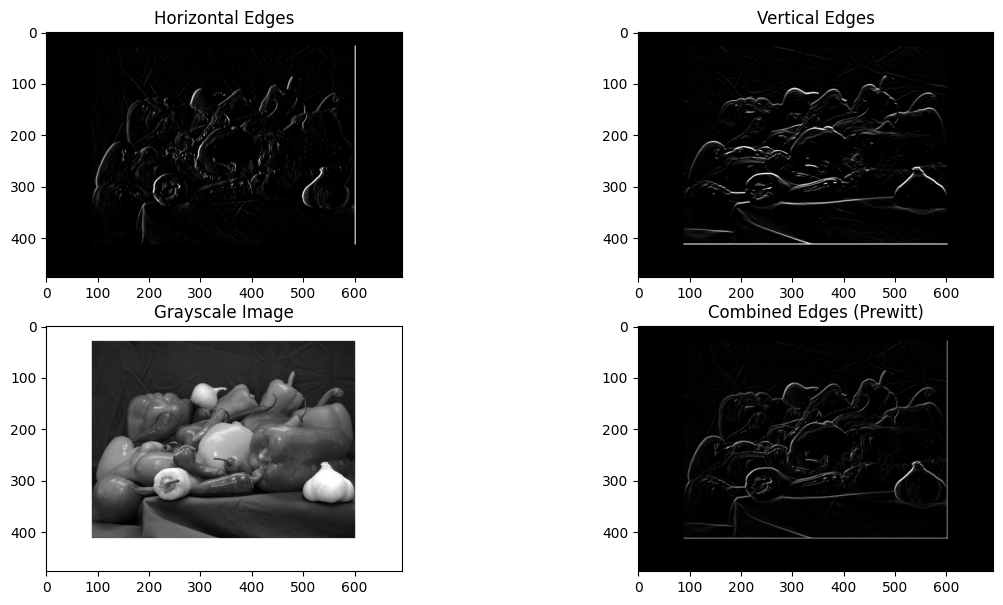

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image data
image_path = "Vegetable Image.png"
image = cv2.imread(image_path)

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Perform Prewitt operation for horizontal mask
prewitt_horizontal = np.array([[-1, 0, 1],
                               [-1, 0, 1],
                               [-1, 0, 1]])
horizontal_edge = cv2.filter2D(gray_image, -1, prewitt_horizontal)

# Step 4: Perform Prewitt operation for the vertical mask
prewitt_vertical = np.array([[-1, -1, -1],
                             [0, 0, 0],
                             [1, 1, 1]])
vertical_edge = cv2.filter2D(gray_image, -1, prewitt_vertical)

# Step 5: Provide a single output for the input image
combined_edges = cv2.addWeighted(horizontal_edge, 0.5, vertical_edge, 0.5, 0)

# Display the original image and the edge-detected image
plt.figure(figsize=(14, 7))
plt.subplot(221), plt.imshow(horizontal_edge, cmap='gray'), plt.title('Horizontal Edges')
plt.subplot(222), plt.imshow(vertical_edge, cmap='gray'), plt.title('Vertical Edges')
plt.subplot(223), plt.imshow(gray_image, cmap='gray'), plt.title('Grayscale Image')
plt.subplot(224), plt.imshow(combined_edges, cmap='gray'), plt.title('Combined Edges (Prewitt)')
plt.show()

# **Observation:**
- Grayscale Conversion: The image is converted to grayscale for edge detection.
- Horizontal Edges: Prewitt with a horizontal mask highlights horizontal edges in the image.
- Vertical Edges: Prewitt with a vertical mask emphasizes vertical edges.
- Combined Edges: The final output combines horizontal and vertical edges.
-Edge Strength: Bright regions indicate strong edges, while dark areas represent weaker or no edges.
-Edge Enhancement: Prewitt filter enhances object boundaries and contours.


---




# **B. Canny edge detection.**

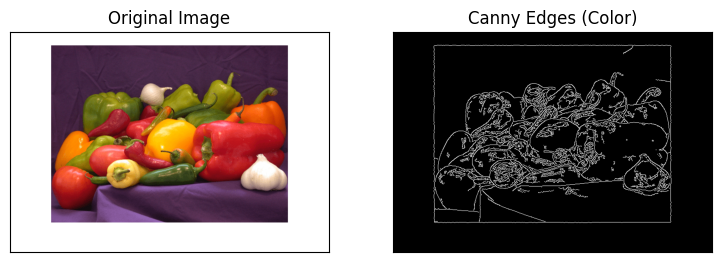

In [59]:
# Load the image
image101 = cv2.imread('Vegetable Image.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image101, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (9, 9), 0)

# Apply Canny edge detection to the grayscale image
edges_gray = cv2.Canny(blurred, threshold1=30, threshold2=100)  # You can adjust the thresholds

# Apply Canny edge detection to the original image
edges_color = cv2.Canny(image101, 50, 150)

# Display the results
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.subplot(131), plt.imshow(cv2.cvtColor(image101, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(edges_color, cmap='gray')
plt.title('Canny Edges (Color)'), plt.xticks([]), plt.yticks([])

plt.show()


# **Observation:**
- Gaussian blur smooths the image, reducing noise for a cleaner edge detection result.

- The Sobel filter calculates gradient magnitude and direction, essential for edge detection.

- Non-maximum suppression thins edges to improve their accuracy and precision.

- Double thresholding helps classify pixels into strong and weak edges, providing better edge clarity.

- Hysteresis edge tracking strengthens weak edges connected to strong edges, enhancing edge continuity.


---



# **C. Laplacian of Gaussian:**



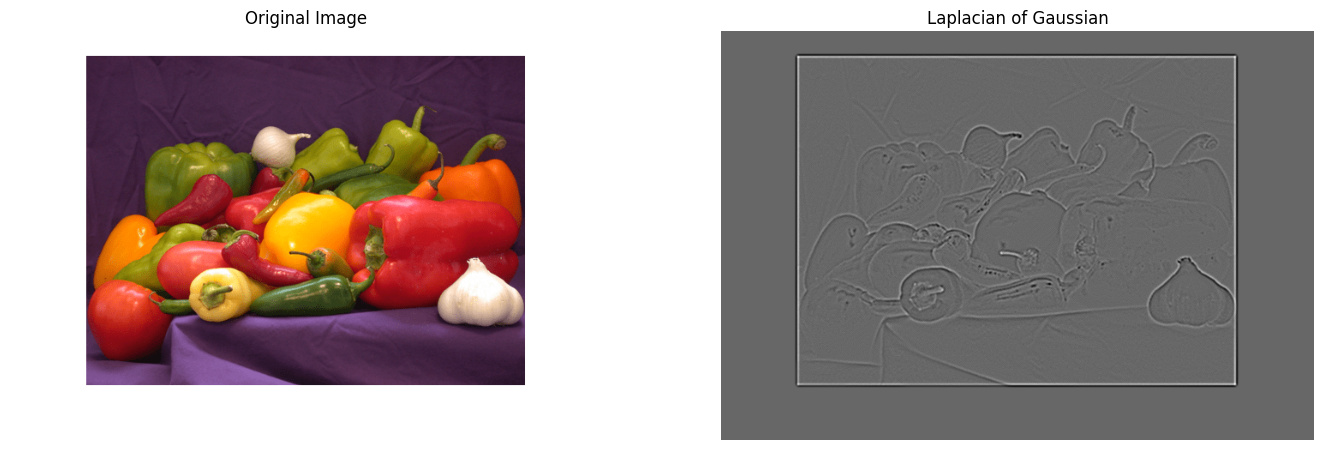

In [60]:
# Step 1: Read the image data
image_path = 'Vegetable Image.png'
image = cv2.imread(image_path)

# Step 2: Remove noise by applying a Gaussian blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Step 3: Convert the image to grayscale
gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)

# Step 4: Apply a Laplacian operator to the grayscale image
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

# Step 5: Display the result in a window
plt.figure(figsize=(26, 12))
plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian of Gaussian'), plt.axis('off')
plt.show()


# **Observation:**
## Laplacian of Gaussian (LoG):

- Gaussian blur smooths the image and reduces noise.
- Laplacian operator highlights regions of rapid intensity change (edges or transitions).
- LoG combines Gaussian smoothing and Laplacian for edge enhancement.
- Output image (LoG result) enhances edge visibility.
Comparison between Gradient-based (Canny) and Gaussian-based (LoG) Operators:

Canny (gradient-based) detects sharp, high-contrast edges with thin lines.
LoG (Gaussian-based) provides smoother, slightly thicker, and more continuous edges.
Choice depends on image characteristics, edge type, and sensitivity to noise.
Canny for sharp edges, LoG for varying edges and noise robustness.


---



# **Comparison between Gradient-based and Gaussian-based operators:**


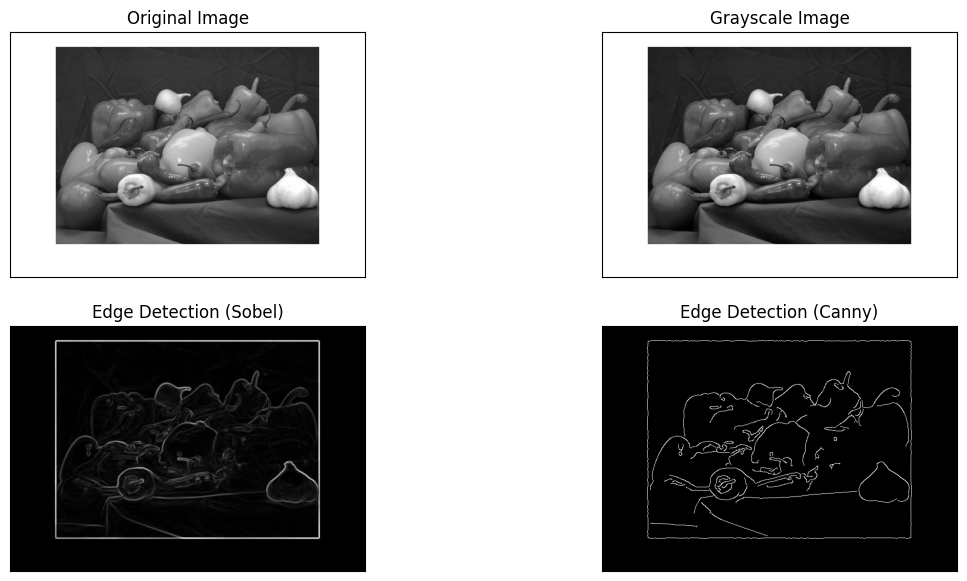

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Vegetable Image.png', cv2.IMREAD_GRAYSCALE)

# Apply the Sobel filter (Gradient-based)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
gradient_magnitude_sobel = np.sqrt(sobel_x**2 + sobel_y**2)

# Apply Gaussian blur (Gaussian-based)
blurred = cv2.GaussianBlur(image, (9, 9), 0)

# Apply Canny edge detection (Gaussian-based)
edges_canny = cv2.Canny(blurred, threshold1=30, threshold2=100)  # You can adjust the thresholds

# Display the results
plt.figure(figsize=(14, 7))
plt.subplot(221), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(image, cmap='gray')
plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(gradient_magnitude_sobel, cmap='gray')
plt.title('Edge Detection (Sobel)'), plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(edges_canny, cmap='gray')
plt.title('Edge Detection (Canny)'), plt.xticks([]), plt.yticks([])

plt.show()


# **Observation:**
- Sobel tends to produce thicker and more continuous edges, suitable for some applications.
- Canny produces thinner and precise edges, useful in tasks like object recognition.
- Canny edge detection is more robust to noise due to the Gaussian blur.
- The choice between Sobel and Canny depends on the specific requirements of the image analysis or processing task.

---

